In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 # 读取数据
data = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')
 # 将 'date' 列转换为日期时间格式
data['date'] = pd.to_datetime(data['date'])
 # 添加年、月、日列
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data = data.set_index('date')
cols_to_convert = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR', 'year', 'month', 'day']
data[cols_to_convert] = data[cols_to_convert].astype(float)

# y = data['AQI指数']
# y = stats.boxcox(y)[0]  #对数据进行BOX-COX变换
# x = data.drop(['AQI指数'], axis=1)
scaler = StandardScaler()
data = scaler.fit_transform(data)

look_back = 7
 # 分割数据集
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [43]:
df_model_eval = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'MAPE'])

In [50]:
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

# Reshape the data to fit the CNN-LSTM network
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
# CNN-LSTM model
model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=10000, batch_size=32, validation_data=(x_test, y_test), verbose=2, callbacks=[early_stop])

predictions = model.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)
MAPE = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)
print("MAPE:", MAPE)

Epoch 1/10000
73/73 - 5s - loss: 0.4958 - val_loss: 0.4057 - 5s/epoch - 68ms/step
Epoch 2/10000
73/73 - 1s - loss: 0.4271 - val_loss: 0.4192 - 559ms/epoch - 8ms/step
Epoch 3/10000
73/73 - 1s - loss: 0.4201 - val_loss: 0.4247 - 553ms/epoch - 8ms/step
Epoch 4/10000
73/73 - 1s - loss: 0.4168 - val_loss: 0.3945 - 587ms/epoch - 8ms/step
Epoch 5/10000
73/73 - 1s - loss: 0.4145 - val_loss: 0.4091 - 546ms/epoch - 7ms/step
Epoch 6/10000
73/73 - 1s - loss: 0.4207 - val_loss: 0.4164 - 537ms/epoch - 7ms/step
Epoch 7/10000
73/73 - 1s - loss: 0.4123 - val_loss: 0.3955 - 549ms/epoch - 8ms/step
Epoch 8/10000
73/73 - 1s - loss: 0.4178 - val_loss: 0.4377 - 558ms/epoch - 8ms/step
Epoch 9/10000
73/73 - 1s - loss: 0.4164 - val_loss: 0.4337 - 571ms/epoch - 8ms/step
Epoch 10/10000
73/73 - 1s - loss: 0.4210 - val_loss: 0.4280 - 557ms/epoch - 8ms/step
Epoch 11/10000
73/73 - 1s - loss: 0.4054 - val_loss: 0.4099 - 553ms/epoch - 8ms/step
Epoch 12/10000
73/73 - 1s - loss: 0.4177 - val_loss: 0.3998 - 559ms/epoch - 

In [46]:
df_model_eval = df_model_eval.append({'Model': 'LSTM',
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'R2': R2,
                                          'MAPE': MAPE},
                                         ignore_index=True)
print(df_model_eval)

  Model       MSE      RMSE       MAE        R2      MAPE
0  LSTM  0.680703  0.825048  0.627974  0.395708  1.360665


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1176\2482355140.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_eval = df_model_eval.append({'Model': 'LSTM',


In [26]:
df_model_eval.to_csv('model_eval-lstm-1.csv')

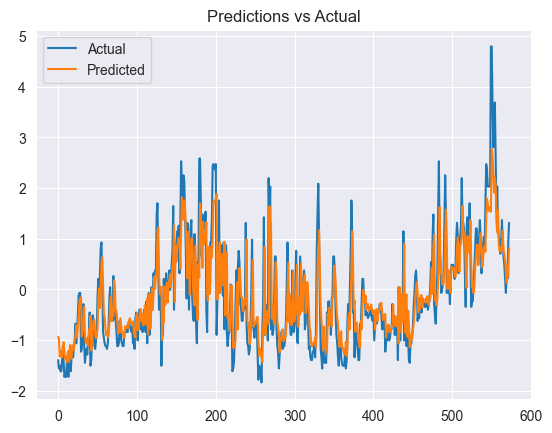

In [30]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

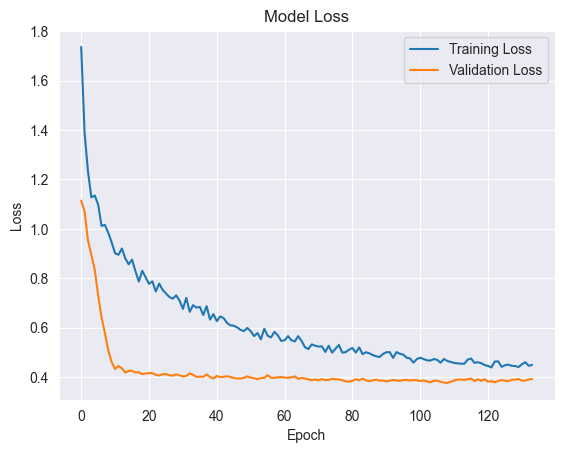

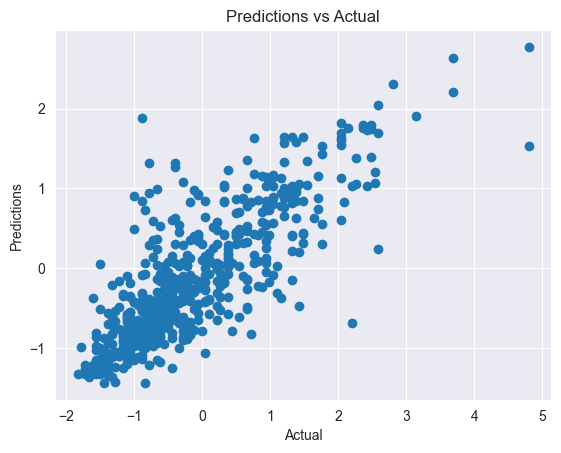

In [27]:
import matplotlib.pyplot as plt
 # 绘制训练和验证损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
 # 绘制预测值和真实值的散点图
plt.scatter(y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

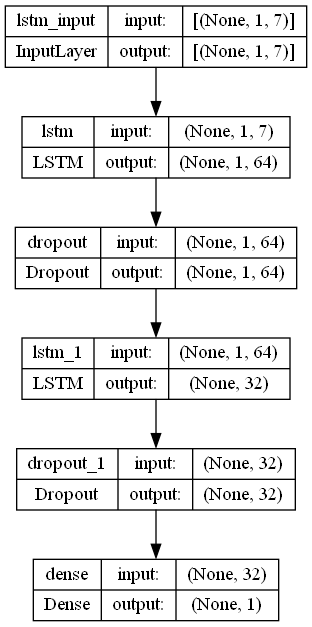

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
 # 绘制模型结构图
plot_model(model, show_shapes=True, show_layer_names=True)

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
 # 绘制模型结构图
plot_model(model, show_shapes=True, show_layer_names=True)
plt.show()

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error



early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')
 # 调整数据形状以适应LSTM网络结构
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
 # LSTM模型

model = Sequential()
model.add(LSTM(512, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.0001), loss='mse')

 # 训练模型
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test), verbose=2, callbacks=[early_stop])

predictions = model.predict(x_test)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))
MAPE = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)
print("MAPE:", MAPE)

Epoch 1/500
73/73 - 4s - loss: 1.7364 - val_loss: 1.1145 - 4s/epoch - 62ms/step
Epoch 2/500
73/73 - 1s - loss: 1.3885 - val_loss: 1.0695 - 1s/epoch - 20ms/step
Epoch 3/500
73/73 - 1s - loss: 1.2321 - val_loss: 0.9523 - 1s/epoch - 17ms/step
Epoch 4/500
73/73 - 1s - loss: 1.1275 - val_loss: 0.8950 - 1s/epoch - 15ms/step
Epoch 5/500
73/73 - 1s - loss: 1.1349 - val_loss: 0.8338 - 1s/epoch - 16ms/step
Epoch 6/500
73/73 - 1s - loss: 1.0984 - val_loss: 0.7312 - 1s/epoch - 15ms/step
Epoch 7/500
73/73 - 1s - loss: 1.0120 - val_loss: 0.6416 - 1s/epoch - 16ms/step
Epoch 8/500
73/73 - 1s - loss: 1.0160 - val_loss: 0.5774 - 1s/epoch - 15ms/step
Epoch 9/500
73/73 - 1s - loss: 0.9838 - val_loss: 0.5072 - 1s/epoch - 15ms/step
Epoch 10/500
73/73 - 1s - loss: 0.9448 - val_loss: 0.4598 - 1s/epoch - 14ms/step
Epoch 11/500
73/73 - 1s - loss: 0.9012 - val_loss: 0.4331 - 1s/epoch - 14ms/step
Epoch 12/500
73/73 - 1s - loss: 0.8952 - val_loss: 0.4453 - 1s/epoch - 15ms/step
Epoch 13/500
73/73 - 1s - loss: 0.920

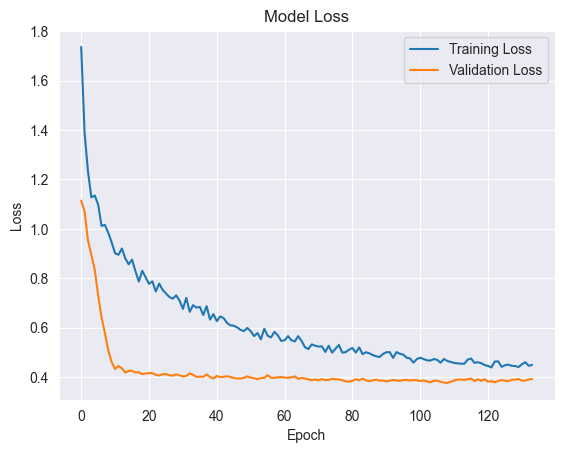

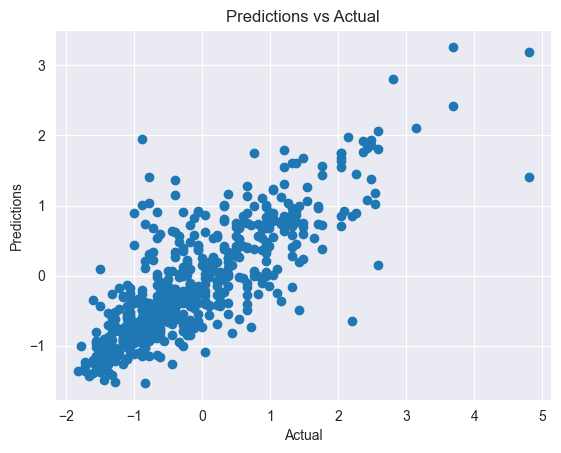

In [17]:
import matplotlib.pyplot as plt
 # 绘制训练和验证损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
 # 绘制预测值和真实值的散点图
plt.scatter(y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

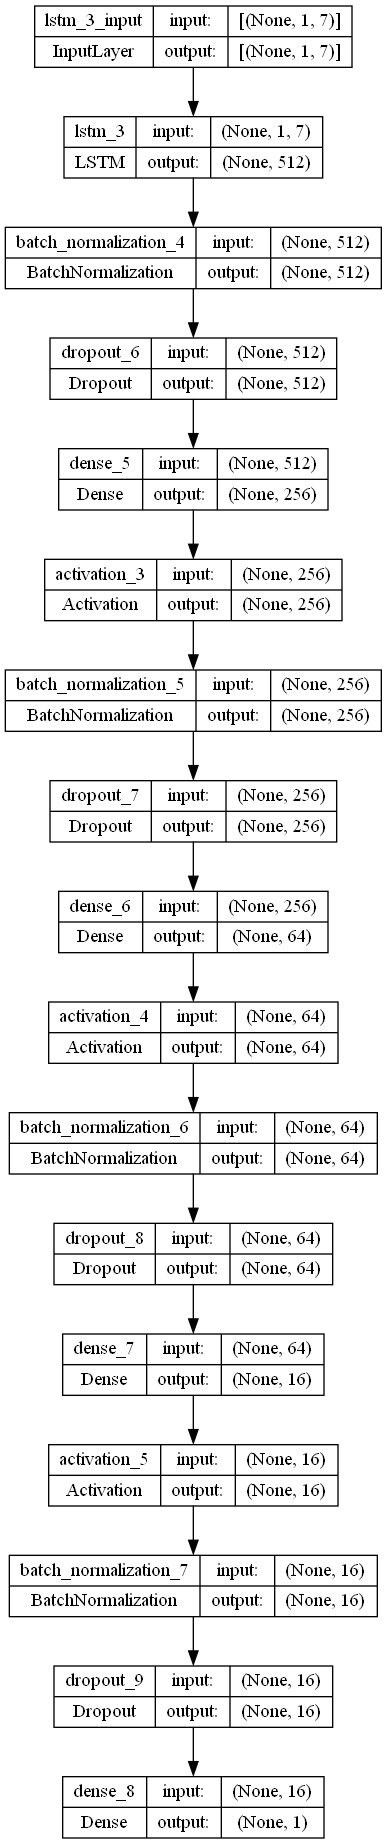

In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
 # 绘制模型结构图
plot_model(model, show_shapes=True, show_layer_names=True)